### Reading and Understanding the Dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
#load dataset
df_main = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df_main.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
df_main.shape

(4340, 8)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#numerical stats
df_main.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#missing values
df_main.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Data Preprocessing

In [ ]:
df_main['Age'] = 2020 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [ ]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [ ]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Age'],
      dtype='object')

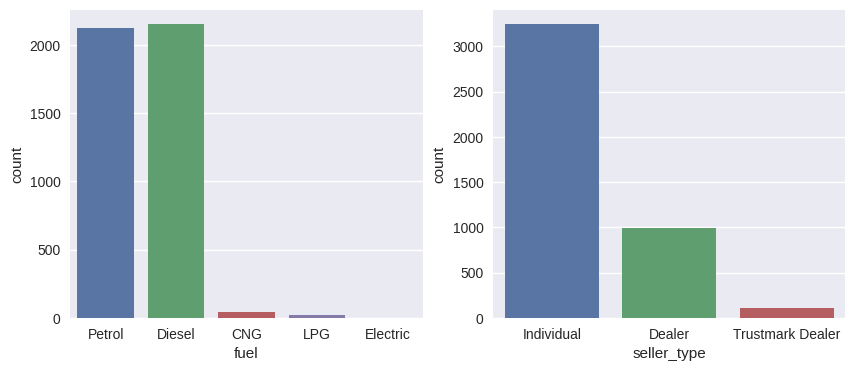

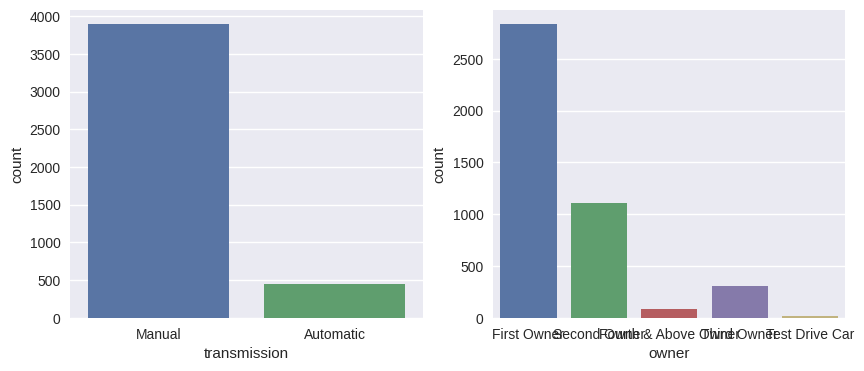

In [ ]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.show()

#### Bivariate/Multi-Variate Analysis

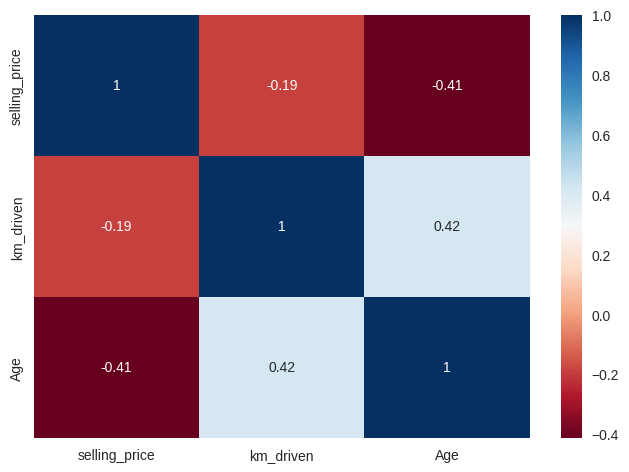

In [ ]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
#df_main.corr()['selling_price']

selling_price    1.000000
km_driven       -0.192289
Age             -0.413922
Name: selling_price, dtype: float64

In [ ]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,9.423081e+05,310000.0,240000.000000,475017.552863
Individual,267225.741935,5.616871e+05,NaN,164545.409091,297196.682972
Trustmark Dealer,NaN,1.184583e+06,NaN,NaN,675277.777778


In [ ]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,1.571880e+06,484419.508366
Individual,1.191722e+06,370861.010224
Trustmark Dealer,1.953158e+06,677289.156627


### Data Preparation

#### Creating Dummies for Categorical Features

In [ ]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [ ]:
df_main.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [ ]:
df_main.head()

,selling_price,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


### Train-Test Split

In [ ]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 13)
x test:  (868, 13)
y train:  (3472,)
y test:  (868,)


### Model Creation/Evaluation

#### Applying regression models
  1 . Random Forest Regression

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.7
Test R2-score : 0.73
Train CV scores : [0.59828972 0.7165246  0.46126406 0.6487307  0.69432324]
Train CV mean : 0.62


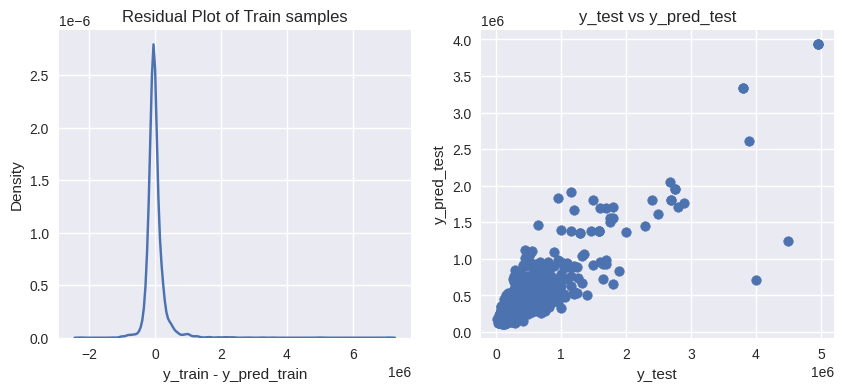

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')

In [ ]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=700)
